In [1]:
import pandas as pd

In [3]:
file_path = "C:/Users/ADMIN/Documents/datasets/traffic.csv"

In [4]:
df = pd.read_csv(file_path)
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB
None
           event        date       country    city  artist        album  \
count     226278      226278        226267  226267  226241       226273   
unique         3           7           211   11993    2419         3254   
top     pageview  2021-08-19  Saudi Arabia  Jeddah  Tesher  Jalebi Baby   
freq      142015       35361         47334   22791   40841        40841   

              track          isrc                 

In [6]:
print(df.isnull().sum())
df = df.dropna()
df = df.fillna('Unknown')

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


In [7]:
df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()

In [8]:
df['date_only'] = df['date'].dt.date
traffic_per_day = df.groupby('date_only').size()

In [9]:
top_countries = df['country'].value_counts().head(10)
top_cities = df['city'].value_counts().head(10)
top_artists = df['artist'].value_counts().head(10)
top_albums = df['album'].value_counts().head(10)
top_tracks = df['track'].value_counts().head(10)
event_counts = df['event'].value_counts()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

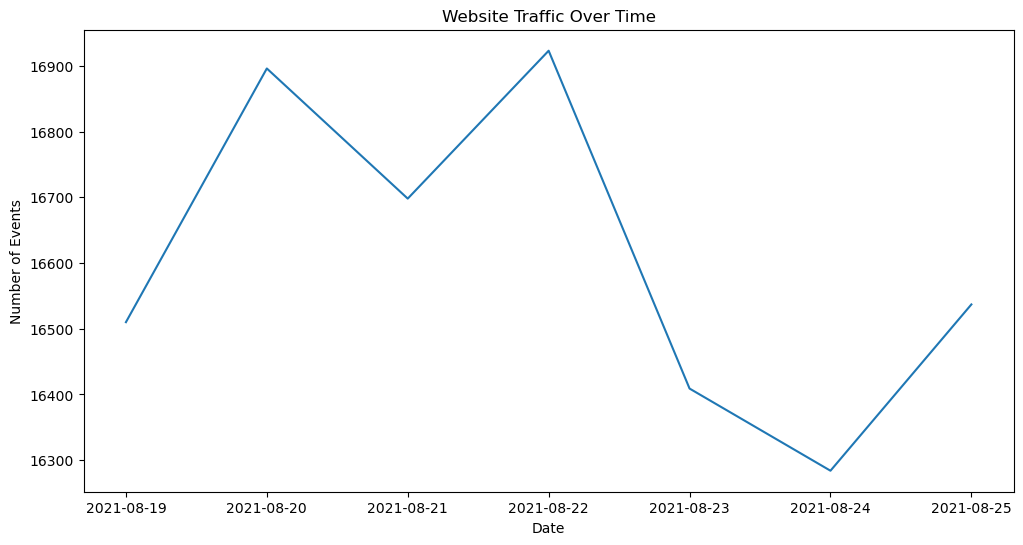

In [11]:
traffic_per_day.plot(figsize=(12, 6))
plt.title('Website Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

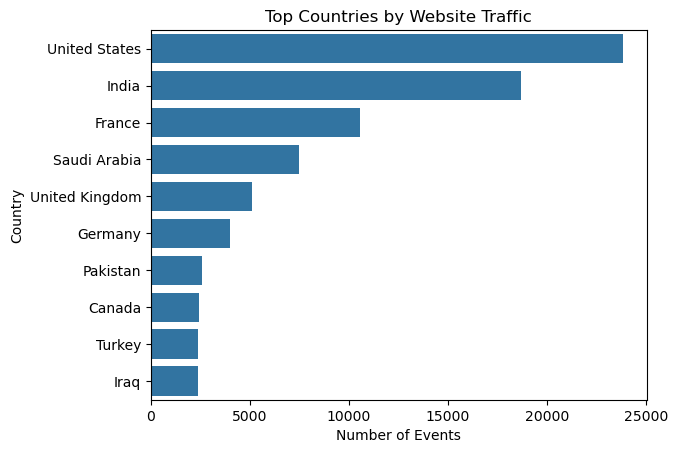

In [12]:
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top Countries by Website Traffic')
plt.xlabel('Number of Events')
plt.ylabel('Country')
plt.show()

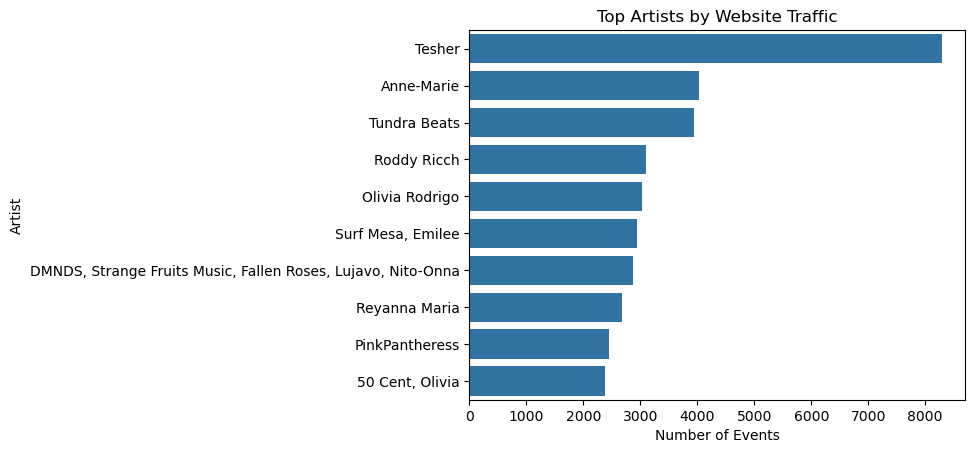

In [13]:
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top Artists by Website Traffic')
plt.xlabel('Number of Events')
plt.ylabel('Artist')
plt.show()

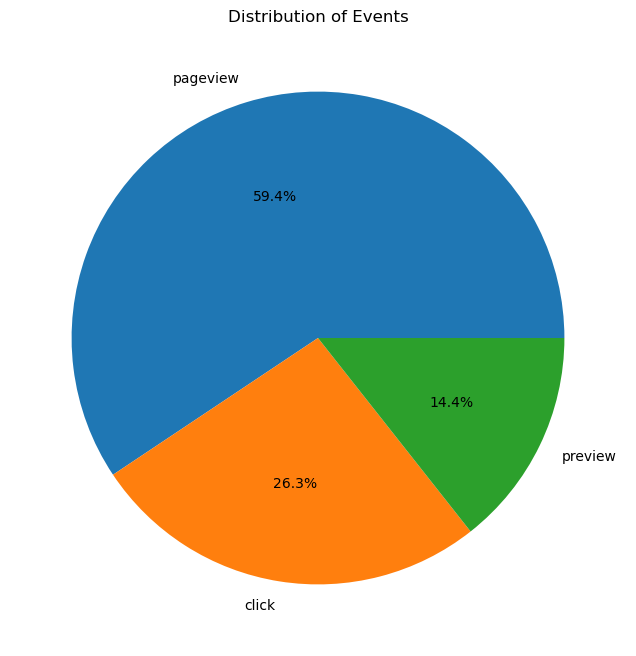

In [14]:
event_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Events')
plt.ylabel('')
plt.show()

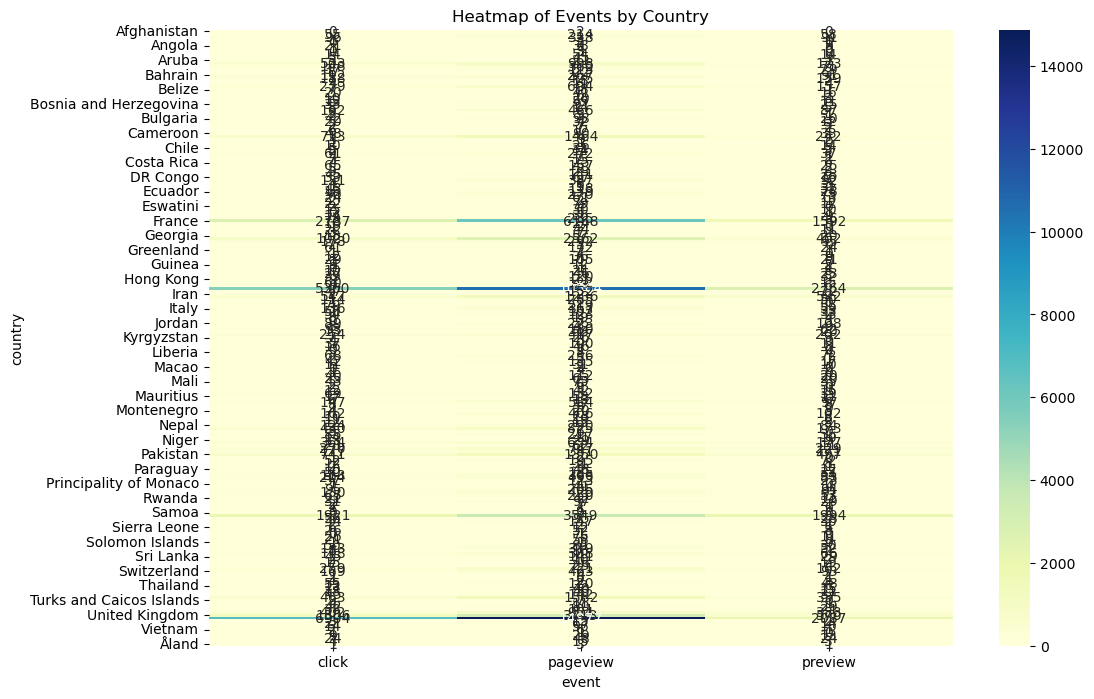

In [15]:
heatmap_data = df.pivot_table(index='country', columns='event', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Events by Country')
plt.show()